# INTERNSHIP @ THE SPARK FOUNDATION
# Data Science & Business Analytics Intern (#GRIPApril21)
# Submitted By : KIRAN KUMAR K
# OBJECT : Prediction using Un-Supervised ML
# Task 2 : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# Data can be found at https://bit.ly/3kXTdox




In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [2]:
iris = datasets.load_iris()
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [3]:
iris_df = pd.DataFrame(iris.data, columns= ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris_df.head(10)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### To find optimum number of clusters, we need to determine the value of K

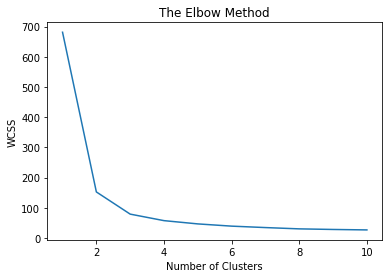

In [4]:
x = iris_df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results into a linegraph,
# Observing 'the Elbow' to predict the number of optimum clusters

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

###  From the above graph we ssee an elbow line at 2,3,4. Lets take the value of k as 3. 

In [5]:
# Applying k-means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


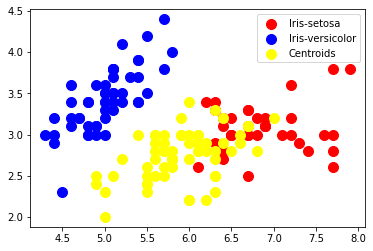

In [6]:
# Visualising the Clusters on the first two columns
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
           s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
           s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# Conclusion :
# Predicted 3 optimum clusters and represented them.
# Thank you :)